In [1]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt

# Ch10 연습문제

**[연습 문제 10-1]**

[그림 10-6]과 같이 오차에 따른 예측 데이터의 산점도를 만들어라.

그 다음 잔차와 모델 예측 데이터 사이의 내적과 상관계수를 계산하라.

(이론적으로는 둘 다 정확히 0이어야 하지만 약간의 반올림 오차가 있을수 있음)

두 결과(내적 또는 상관계수) 중 어느 것이 더 작으며 그 이유는 무엇인가?

In [2]:
# 랜덤 데이터 생성
np.random.seed(0)
numcourses = np.random.randint(0, 15, size=20)
happiness = np.random.randint(20, 100, size=20)

In [3]:
# 설계 행렬
X = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))

In [4]:
# 왼쪽 역행렬을 이용한 모델 학습
X_leftinv = np.linalg.inv(X.T @ X) @ X.T
beta = X_leftinv @ happiness

In [5]:
# 예측 값
pred_happiness = X @ beta

In [6]:
# 잔차 계산
res = happiness - pred_happiness

# 내적과 상관계수 계산
dot_product = np.dot(pred_happiness, res)
correlation = np.corrcoef(pred_happiness, res)[0, 1]
print(f'Dot product: {dot_product}')
print(f'Correlation: {correlation}')

Dot product: 4.0245140553452075e-11
Correlation: 6.974270100064658e-16


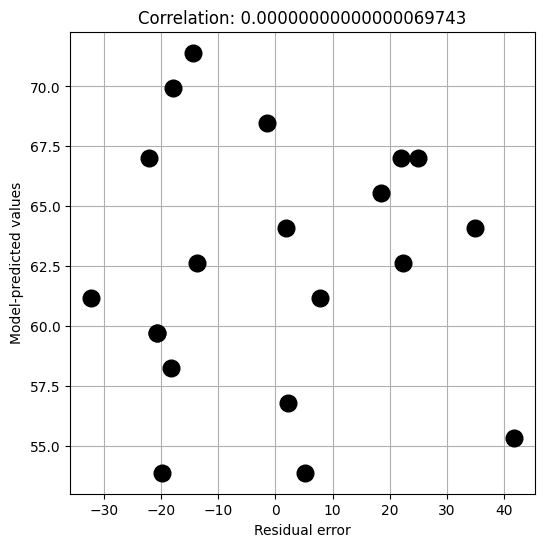

In [7]:
# 잔차와 예측 값 간의 산점도
plt.figure(figsize=(6, 6))
plt.plot(res, pred_happiness, 'ko', markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'Correlation: {correlation:.20f}')
plt.grid(True)
plt.show()

상관계수가 내적보다 일반적으로 더 작고 0에 가깝지않나...?..

상관계수는 벡터 크기의 영향을 제거하고 방향(상관관계)만 반영하니까...

**[연습 문제 10-2]**

앞서 모델로 예측한 행복도는 단지 설계 행렬의 열을 선형적으로 결합하는 한 가지 방법임

잔차벡터는 그 하나의 선형 가중 결합에만 직교하는 것이 아님

대신 잔차벡터는 설계 행렬을 생성하는 전체 부분공간과 직교함

(힌트: 왼쪽 영공간과 계수)

In [8]:
# 최소제곱법을 이용
X_inv = np.linalg.inv(X.T @ X) @ X.T
b = X_inv @ happiness

In [9]:
# 예측 값과 잔차 벡터
y_pred = X @ b
res = happiness - y_pred

In [10]:
# 설계 행렬의 왼쪽 영공간(null space)
null_sp = null_space(X.T)  # X.T의 영공간

In [11]:
# 잔차 벡터를 영공간 행렬에 추가
null_sp_aug = np.hstack((null_sp, res.reshape(-1, 1)))

In [12]:
# 비교
rank_null = np.linalg.matrix_rank(null_sp)
rank_aug = np.linalg.matrix_rank(null_sp_aug)
print(f'dim(N(X)) = {rank_null}')
print(f'dim([N(X)|r]) = {rank_aug}')

# 영공간의 랭크와 잔차 추가 후 랭크가 같다면, 잔차 벡터가 설계 행렬의 열 전체에 직교함을 의미

dim(N(X)) = 18
dim([N(X)|r]) = 18


**[연습 문제 10-4]**


이 문제에서는 **이상치(outlier)**가 최소제곱법을 통한 회귀 모델에 미치는 영향을 관찰할 것

행복도 데이터에서 첫 번째 값을 70에서 170으로 변경하여 입력 오류를 시뮬레이션하고, 회귀 모델의 적합도를 확인

이후 첫 번째 데이터를 다시 70으로 되돌리고, 이번에는 마지막 데이터를 170으로 변경하여 재확인

두 경우 모두 **이상치 값(170)**는 동일하지만, 이 값의 위치에 따라 모델 적합도에 미치는 영향이 다르게 나타날 수 있음

이를 통해 모델이 이상치에 얼마나 민감한지 알아볼 것.

In [13]:
# 이상치 추가
# 첫 번째 데이터
y1 = happiness.copy()
y1[0] = 170

# 마지막 데이터
y2 = happiness.copy()
y2[-1] = 170

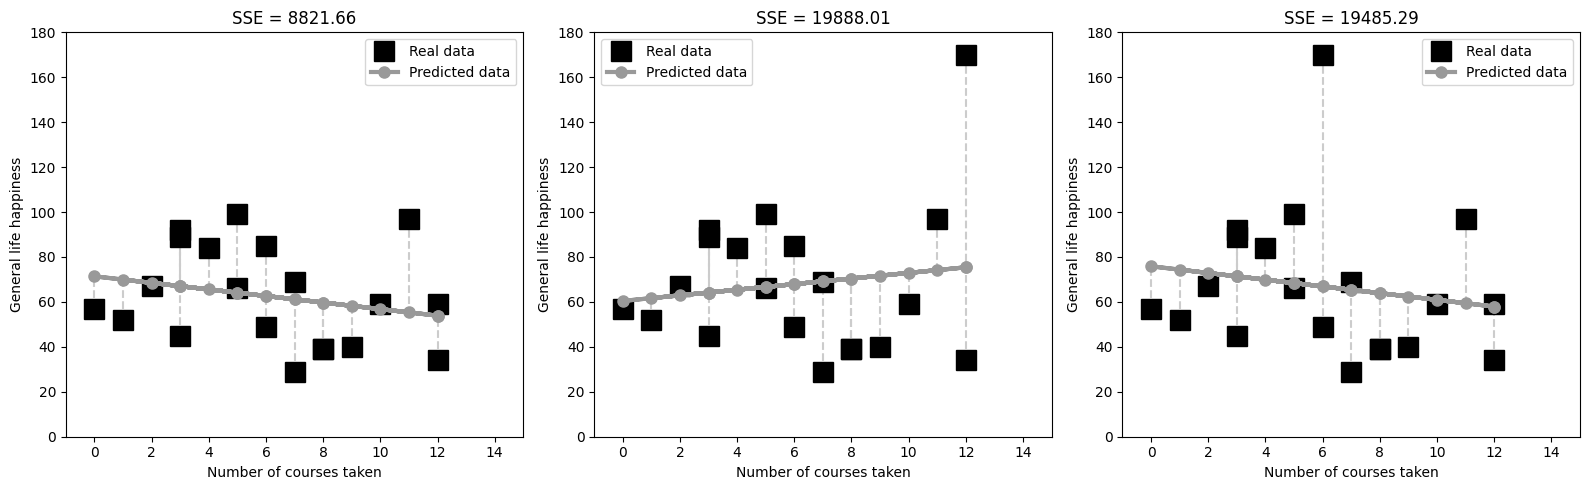

In [20]:
# 시각화
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# 반복
for ax, y_data in zip(axs, [happiness, y1, y2]):
    # 회귀 계수 계산
    b = X_inv @ y_data

    y_hat = X @ b

    # 데이터와 예측 값
    ax.plot(numcourses, y_data, 'ks', markersize=15, label='Real data')
    ax.plot(numcourses, y_hat, 'o-', color=[.6, .6, .6], linewidth=3, markersize=8, label='Predicted data')

    # 잔차(오차)
    for n, y_val, y_hat_val in zip(numcourses, y_data, y_hat):
        ax.plot([n, n], [y_val, y_hat_val], '--', color=[.8, .8, .8], zorder=-10)

    ax.set(xlabel='Number of courses taken', ylabel='General life happiness',
           xlim=[-1, 15], ylim=[0, 180], xticks=range(0, 15, 2))
    ax.legend()
    ax.set_title(f'SSE = {np.sum((y_hat - y_data) ** 2):.2f}')  # SSE(잔차 제곱합) 표시

# 출력
plt.tight_layout()
plt.savefig('Figure_10_07.png', dpi=300)
plt.show()